In [10]:
import pandas as pd

In [ ]:
df = pd.read_csv('../Dataset/news_ratings/companies-news-market-cap-ratio.csv')

In [12]:
# Normalize the company name from companyName field

# List of companies
companies = [
    'Reliance', 'TCS', 'HDFC Bank', 'Bharti Airtel', 'ICICI Bank', 'Infosys', 
    'State Bank of India', 'ITC', 'Hindustan Unilever', 'Life Insurance', 
    'Larsen & Toubro', 'HCL Technologies', 'Sun Pharma', 'Bajaj Finance', 
    'NTPC', 'M&M', 'Axis Bank', 'Maruti Suzuki', 'Kotak Mahindra Bank', 
    'Adani Enterprise', 'ONGC', 'UltraTech Cement', 'Wipro', 'Tata Motors', 
    'Hindustan Aeronautics', 'Adani Ports', 'Power Grid Corporation', 
    'Titan Company', 'Bajaj Finserv', 'Bajaj Auto', 'Asian Paints', 
    'Coal India', 'Siemens', 'Adani Green', 'Avenue Super.', 'JSW Steel', 
    'Adani Power', 'Trent', 'Nestle India', 'Zomato Ltd', 'Bharat Electron', 
    'Hindustan Zinc', 'Jio Financial', 'IOCL', 'DLF', 'IRFC', 'Varun Beverages', 
    'Tata Steel', 'Vedanta', 'LTIMindtree'
]

# Normalize companyName
for company in companies:
    # Generate a regex pattern for matching company prefixes
    pattern = r'(?i)\b' + company.replace(" ", r"\s?") + r'\b.*'
    df['companyName'] = df['companyName'].str.replace(pattern, company, regex=True)

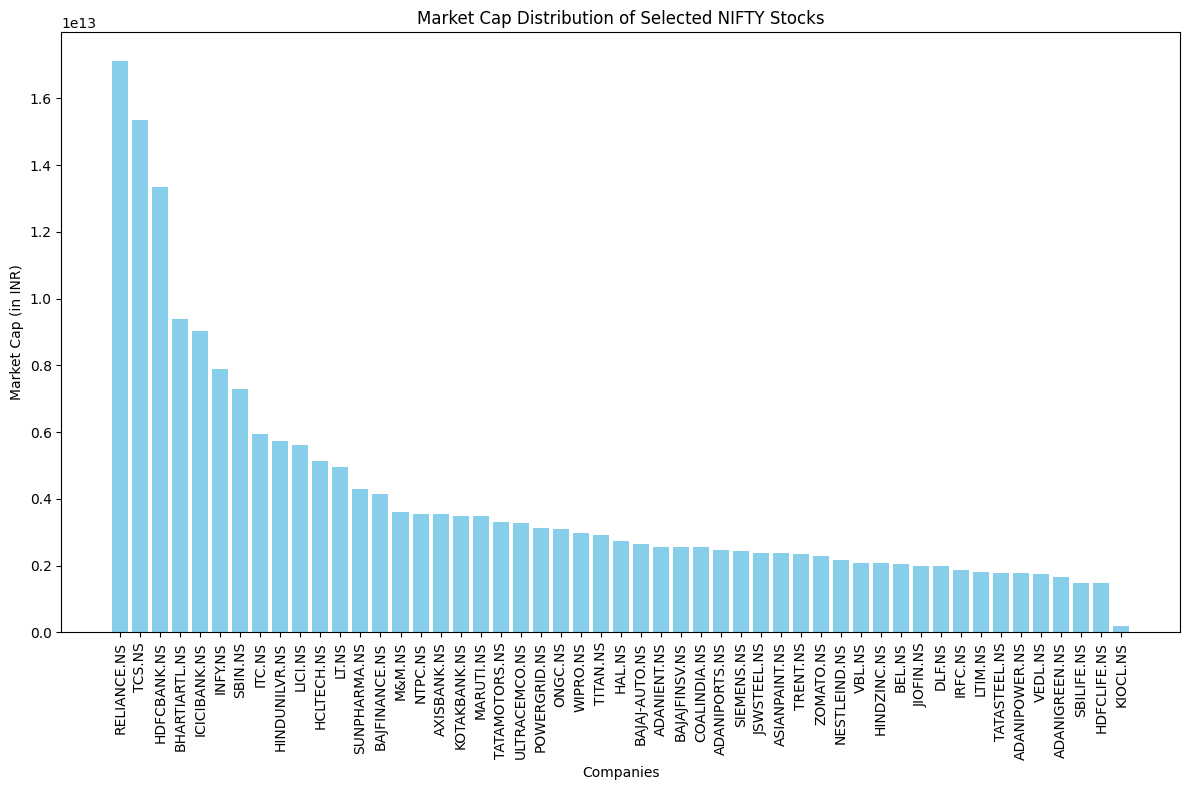

In [13]:
import yfinance as yf
import matplotlib.pyplot as plt

# List of stock symbols (as per Yahoo Finance naming conventions, update if needed)
stock_symbols = [
    "TATAMOTORS.NS", "TATASTEEL.NS", "RELIANCE.NS", "ADANIPOWER.NS", "ADANIENT.NS",
    "HDFCBANK.NS", "AXISBANK.NS", "BHARTIARTL.NS", "INFY.NS", "HINDUNILVR.NS",
    "ITC.NS", "TCS.NS", "COALINDIA.NS", "NESTLEIND.NS", "JSWSTEEL.NS",
    "BAJAJFINSV.NS", "LT.NS", "NTPC.NS", "MARUTI.NS", "ULTRACEMCO.NS",
    "ONGC.NS", "DLF.NS", "VEDL.NS", "SUNPHARMA.NS", "M&M.NS", "SIEMENS.NS",
    "BAJAJ-AUTO.NS", "ICICIBANK.NS", "ADANIENT.NS", "HAL.NS", "VBL.NS",
    "LICI.NS", "TITAN.NS", "SBIN.NS", "HCLTECH.NS", "SUNPHARMA.NS",
    "BAJFINANCE.NS", "KOTAKBANK.NS", "POWERGRID.NS", "ADANIPORTS.NS",
    "WIPRO.NS", "ASIANPAINT.NS", "ADANIGREEN.NS", "TRENT.NS", "HINDZINC.NS",
    "ZOMATO.NS", "BEL.NS", "JIOFIN.NS", "LTIM.NS", "SBILIFE.NS", "HDFCLIFE.NS",
    "IRFC.NS", "KIOCL.NS"
]

# Dictionary to store market cap data
market_caps = {}

# Fetch market cap data for each symbol
for symbol in stock_symbols:
    try:
        stock = yf.Ticker(symbol)
        market_cap = stock.info.get('marketCap', None)  # Market cap in local currency
        if market_cap:
            market_caps[symbol] = market_cap
    except Exception as e:
        print(f"Error fetching data for {symbol}: {e}")

# Sort companies by market cap
market_caps = dict(sorted(market_caps.items(), key=lambda x: x[1], reverse=True))

# Plotting market cap distribution
plt.figure(figsize=(12, 8))
plt.bar(market_caps.keys(), market_caps.values(), color='skyblue')
plt.xticks(rotation=90)
plt.title('Market Cap Distribution of Selected NIFTY Stocks')
plt.xlabel('Companies')
plt.ylabel('Market Cap (in INR)')
plt.tight_layout()
plt.show()


In [14]:
df.head()

,source,authors,title,description,publishedAt,url,summary,companyName,source_url,summary_vader,description_vader,summary_sentiment,description_sentiment
0,Forbes,"John Kang, Forbes Staff, \n John Kang, Forbes ...",Hyundai Motor India Shares Slump As Trading Be...,The South Korean car maker’s $3.3 billion shar...,2024-10-22 16:00:08,https://www.forbes.com/sites/johnkang/2024/10/...,Hyundai Motor India managing director Unsoo Ki...,Tata Motors,https://www.forbes.com,0.0000,0.2960,1.0,2.0
1,Forbes,"Gloria Haraito, Forbes Staff, \n Gloria Harait...",What’s Driving The Son Of India’s Richest Woma...,"Amid India’s EV push, steel magnate Sajjan Jin...",2024-10-09 22:03:27,https://www.forbes.com/sites/gloriaharaito/202...,Sajjan (left) and Parth Jindal.\nJSW Group\nTh...,Tata Motors,https://www.forbes.com,0.7783,0.4767,2.0,2.0
2,Livemint,George Skaria,Tata’s next challenge: Leadership void at Trusts,"With Ratan Tata’s passing, the lack of a clear...",2024-10-11 05:50:52,https://www.livemint.com/opinion/ratan-tata-de...,With the passing of Ratan Naval Tata (1937-202...,Tata Motors,https://www.livemint.com,0.0772,0.6486,1.0,0.0
3,Business Standard,Dev Chatterjee,"Tata Capital, Tata Motors Finance merger recei...",Tata Capital-Tata Motors Finance Merger: Throu...,2024-10-14 13:41:19,https://www.business-standard.com/companies/ne...,"Through this merger, Tata Capital aims to attr...",Tata Motors,https://www.business-standard.com,0.4939,0.4939,2.0,2.0
4,Livemint,Nikita Prasad,Ratan Tata passes away at 86: Top business tyc...,"Ratan Tata breathed his last on Wednesday, Oct...",2024-10-09 19:46:32,https://www.livemint.com/companies/people/rata...,"Ratan Tata passes away:Ratan Tata, chairman em...",Tata Motors,https://www.livemint.com,-0.3182,-0.1779,0.0,1.0


In [15]:
import yfinance as yf
import pandas as pd

# Define the mapping of company names to Nifty 50 tickers
company_to_ticker = {
    'Tata Motors': 'TATAMOTORS.NS',
    'Tata Steel': 'TATASTEEL.NS',
    'Reliance': 'RELIANCE.NS',
    'Adani Power': 'ADANIPOWER.NS',
    'Adani Enterprises': 'ADANIENT.NS',
    'HDFC Bank': 'HDFCBANK.NS',
    'Axis Bank': 'AXISBANK.NS',
    'Bharti Airtel': 'BHARTIARTL.NS',
    'Infosys': 'INFY.NS',
    'Hindustan Unilever': 'HINDUNILVR.NS',
    'ITC': 'ITC.NS',
    'TCS': 'TCS.NS',
    'Coal India': 'COALINDIA.NS',
    'Nestle India': 'NESTLEIND.NS',
    'JSW Steel': 'JSWSTEEL.NS',
    'Bajaj Finserv': 'BAJAJFINSV.NS',
    'L&T': 'LT.NS',
    'NTPC': 'NTPC.NS',
    'Maruti Suzuki': 'MARUTI.NS',
    'UltraTech Cement': 'ULTRACEMCO.NS',
    'ONGC': 'ONGC.NS',
    'DLF': 'DLF.NS',
    'Vedanta': 'VEDL.NS',
    'Sun Pharma': 'SUNPHARMA.NS',
    'M&M': 'M&M.NS',
    'Siemens': 'SIEMENS.NS',
    'Bajaj Auto': 'BAJAJ-AUTO.NS',
    'ICICI Bank': 'ICICIBANK.NS',
    'HAL': 'HAL.NS',
    'VBL': 'VBL.NS',
    'LICI': 'LICI.NS',
    'Titan': 'TITAN.NS',
    'SBI': 'SBIN.NS',
    'HCL Technologies': 'HCLTECH.NS',
    'Bajaj Finance': 'BAJFINANCE.NS',
    'Kotak Mahindra Bank': 'KOTAKBANK.NS',
    'Power Grid': 'POWERGRID.NS',
    'Adani Ports': 'ADANIPORTS.NS',
    'Wipro': 'WIPRO.NS',
    'Asian Paints': 'ASIANPAINT.NS',
    'Adani Green': 'ADANIGREEN.NS',
    'Trent': 'TRENT.NS',
    'Hindustan Zinc': 'HINDZINC.NS',
    'Zomato': 'ZOMATO.NS',
    'Bharat Electronics': 'BEL.NS',
    'Jio Financial': 'JIOFIN.NS',
    'LTIMindtree': 'LTIM.NS',
    'SBI Life': 'SBILIFE.NS',
    'HDFC Life': 'HDFCLIFE.NS',
    'IRFC': 'IRFC.NS',
    'KIOCL': 'KIOCL.NS'
}

def get_nifty50_market_cap():
    # Fetch market-cap data for each company
    market_caps = {}
    for company, ticker in company_to_ticker.items():
        stock = yf.Ticker(ticker)
        info = stock.info
        market_caps[ticker] = info.get("marketCap", 0)

    # Calculate total market cap of NIFTY 50
    total_market_cap = sum(market_caps.values())
    
    # Calculate percentage of total market-cap for each company
    percentage_market_caps = {ticker: (cap / total_market_cap) for ticker, cap in market_caps.items()}

    return percentage_market_caps

# Get the market cap percentages for the NIFTY 50 companies
percentage_market_caps = get_nifty50_market_cap()

# Map the company names in the dataset to the corresponding market cap percentages
df['companyTicker'] = df['companyName'].map(company_to_ticker)
df['market_cap_ratio'] = df['companyTicker'].map(percentage_market_caps)


In [16]:
df.head()

,source,authors,title,description,publishedAt,url,summary,companyName,source_url,summary_vader,description_vader,summary_sentiment,description_sentiment,companyTicker,market_cap_ratio
0,Forbes,"John Kang, Forbes Staff, \n John Kang, Forbes ...",Hyundai Motor India Shares Slump As Trading Be...,The South Korean car maker’s $3.3 billion shar...,2024-10-22 16:00:08,https://www.forbes.com/sites/johnkang/2024/10/...,Hyundai Motor India managing director Unsoo Ki...,Tata Motors,https://www.forbes.com,0.0000,0.2960,1.0,2.0,TATAMOTORS.NS,0.016092
1,Forbes,"Gloria Haraito, Forbes Staff, \n Gloria Harait...",What’s Driving The Son Of India’s Richest Woma...,"Amid India’s EV push, steel magnate Sajjan Jin...",2024-10-09 22:03:27,https://www.forbes.com/sites/gloriaharaito/202...,Sajjan (left) and Parth Jindal.\nJSW Group\nTh...,Tata Motors,https://www.forbes.com,0.7783,0.4767,2.0,2.0,TATAMOTORS.NS,0.016092
2,Livemint,George Skaria,Tata’s next challenge: Leadership void at Trusts,"With Ratan Tata’s passing, the lack of a clear...",2024-10-11 05:50:52,https://www.livemint.com/opinion/ratan-tata-de...,With the passing of Ratan Naval Tata (1937-202...,Tata Motors,https://www.livemint.com,0.0772,0.6486,1.0,0.0,TATAMOTORS.NS,0.016092
3,Business Standard,Dev Chatterjee,"Tata Capital, Tata Motors Finance merger recei...",Tata Capital-Tata Motors Finance Merger: Throu...,2024-10-14 13:41:19,https://www.business-standard.com/companies/ne...,"Through this merger, Tata Capital aims to attr...",Tata Motors,https://www.business-standard.com,0.4939,0.4939,2.0,2.0,TATAMOTORS.NS,0.016092
4,Livemint,Nikita Prasad,Ratan Tata passes away at 86: Top business tyc...,"Ratan Tata breathed his last on Wednesday, Oct...",2024-10-09 19:46:32,https://www.livemint.com/companies/people/rata...,"Ratan Tata passes away:Ratan Tata, chairman em...",Tata Motors,https://www.livemint.com,-0.3182,-0.1779,0.0,1.0,TATAMOTORS.NS,0.016092


In [ ]:
df.to_csv('../Dataset/news_ratings/companies-news-market-cap-ratio.csv')